# 02. Introduction and Motivation

When electronic equipment has to be isolated from one another, reading out the signals becomes a challenge. An example of such a problem is the case of the pressure readout of a compact deuterium-deuterium fast neutron generator. The details of the device are not important, but there is an electrode within the neutron generator system that is biased to around -100 kV, or 100000 V. When there is a high voltage discharge from the high voltage to the ground, it can created unwanted disruptions in nearby electronic devices, which are very sensitive to this type of discharges. To protect equipment, the pressure levels displayed on a so called single gauge readout have to be read out with a camera. This makes manual work a requirement, that is very tidious. To automatise the recording of the values displayed on the pressure readout, an algorithm was developed that automatically reads the pressure level from the display. Ideally, the algorithm would detect the regions with digits in the image by itself. However, at the time of this writing, that step in the digit detection or localisation was not included in the pipeline.

One test image, that represents what the camera is viewing is shown below. The code loads the test image and displays it.

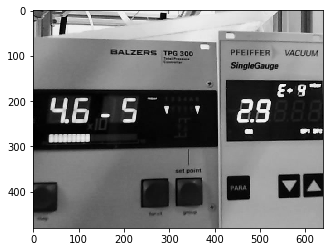

In [7]:
import cv2
import matplotlib.pyplot as plt
from PressureReadoutObjectStorage import PressureReadoutObjectStorage

# create object, load test image
pro = PressureReadoutObjectStorage()
img = pro.read_test_image('./test_img.csv')

# plot the image
plt.imshow(img, cmap='gray')
plt.show()

The challenge is to read three digits, indicated in the figure below in red. Ideally, the algorithm would find the position of the digits on its own and then report each of them back. Note that the second readout in the right part of the image is not relevant and does not need to be read out.

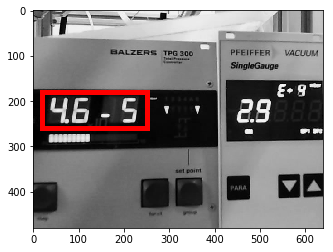

In [21]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

# draw rectangles around the region of interest and plot the image
fig,ax = plt.subplots(1)
ax.imshow(img, cmap='gray')
rect = patches.Rectangle((20,180),230,80,linewidth=5,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

### Pipeline

The pipeline of the algorithm to read the digits on the readout is shown below. 

Step "1. Retrieve image from camera / load image" will be considered very simplified. Instead of connecting to the camera with openCV, we will only import a test image that is the same as the camera will read. However, the connection to the camera could be made with the code shown further below.

In step "2. Digit classification" the Street View House Number (SVHN) dataset (http://ufldl.stanford.edu/housenumbers/) is used to train a KERAS model that classifies images that contain digits into classes 0,1,...,9. 

For the step "3. Digit detection / localisation" we will just take the ground truth and give the algorithm the correct position of the images. However, one solution (that is time consuming) is shown to find the position of the digits. There are better algorithms for that out there. For the sake of this project, that part can always be refined on later.


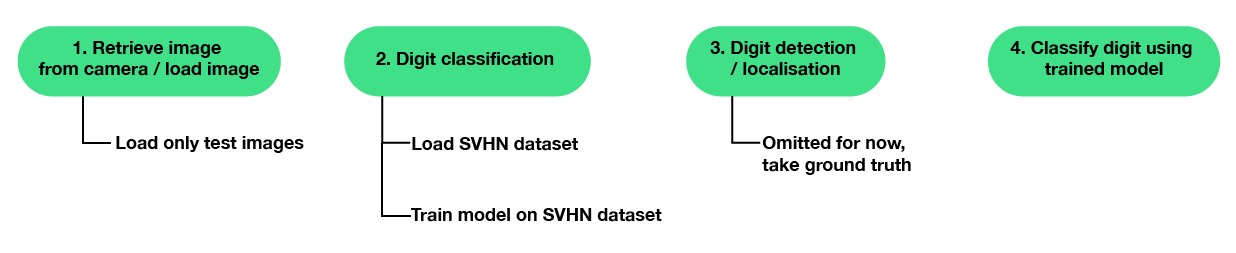

In [25]:
from IPython.display import Image
Image("./pipeline.png")

### Code to connect to the IP camera with openCV

In [ ]:
class PressureReadoutObject():

    def __init__(self, credentials_file):
        # load the credentials
        credentials = pd.read_csv(credentials_file, header=0)
        pw = credentials['password'].values[0]
        self.password = pw
        self.host = 'fastdd01' # camera feed of the camera pointing on the pressure readout
        self.user = 'admin' # connect to the camera

    def read_camera(self):
        """
        Connects to the camera feed, reads it and returns an array of the pixel values.
        """
        url = f'http://{user}:{self.password}@{host}/video.cgi'  # this needs to be changed for another camera !
        cap = cv2.VideoCapture(url)
        r, f = cap.read()
        if r == True:
            return f
        else:
            print('ERROR! Could not read camera...')
            return -1

# cred are the credentials
pro = PressureReadoutObject(cred)
img = pro.read_camera()
img = pro.convert_rgb2gray(img) # convert from RGB to gray